In [289]:
import liwc 
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import datetime as dt

sns.set()

In [290]:
import warnings
warnings.filterwarnings('ignore')

In [291]:
df = pd.read_csv('diaries_revolution.csv')
df.head() 

,Author,Date,Text
0,Михаил Богословский,1916-11-01,"Был в факультетском заседании, на котором Груш..."
1,Лев Троцкий,1916-11-01,Утром со шпиком ходил на почту. После того пос...
2,Анатолий Савенко,1916-11-01,"Как жаль, что страна не узнает речи Милюкова. ..."
3,Великий князь Николай Михайлович,1916-11-01,"Я долго колебался открыть тебе истину, но посл..."
4,Императрица Александра Федоровна,1916-11-01,"Мой любимый, дорогой! Я очень огорчена тем, чт..."


# Разметка

In [292]:
parse, category_name = liwc.load_token_parser('Russian_LIWC2007_Dictionary.dic')

In [293]:
import re
from collections import Counter

def tokenize(text):
    for match in re.finditer(r'\w+', text, re.UNICODE):
        yield match.group(0)

In [294]:
df['Text'][100]

'Соединение самой современной техники с искусством есть ярчайшее проявление духа революции. Паровозы истории мчат вперед, сжигая в топках пережитки старого мира. Собираем пассажиров и попутчиков — не зевай, залезай, а то не успеешь. Время ускорилось. Паровозные скорости не обгонишь. Поездом — вперед! Ожидаемся прибытием — в будущее!'

In [295]:
emotions = ['Позитив', 'Негатив', 'Беспокойство', 'Гнев', 'Грусть', 'Уверенность', 'Согласие']
emotions_dict = {
    'Позитив' : 0, 
    'Негатив' : 1, 
    'Беспокойство' : 2, 
    'Гнев' : 3, 
    'Грусть' : 4, 
    'Уверенность' : 5, 
    'Согласие' : 6
}

In [296]:
_ = np.zeros((df.shape[0], 7), dtype=float)

df_target = pd.DataFrame(data=_, 
                         columns=['Позитив', 'Негатив', 'Беспокойство', 'Гнев', 'Грусть', 'Уверенность', 'Согласие'])

df_target

,Позитив,Негатив,Беспокойство,Гнев,Грусть,Уверенность,Согласие
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
7729,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7730,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7731,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7732,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [297]:
df_target.iloc[12, emotions_dict['Негатив']]

0.0

In [298]:
for idx, row in df.iterrows(): 
    tokens = tokenize(row['Text'])
    
    for token in tokens: 
        for category in parse(token): 
            if category in emotions: 
                df_target.iloc[idx, emotions_dict[category]] += 1
                
    # Считаем долю (или же вероятность) каждого класса             
    df_target.iloc[idx, :] /= len(row['Text'])

In [299]:
df_target

,Позитив,Негатив,Беспокойство,Гнев,Грусть,Уверенность,Согласие
0,0.000000,0.005831,0.000000,0.002915,0.002915,0.005831,0.002915
1,0.002941,0.003922,0.000980,0.000000,0.001961,0.003922,0.000980
2,0.000000,0.014563,0.004854,0.000000,0.004854,0.000000,0.000000
3,0.004972,0.002841,0.000000,0.002841,0.000000,0.003551,0.000000
4,0.006803,0.009524,0.002721,0.000000,0.004082,0.004082,0.002721
...,...,...,...,...,...,...,...
7729,0.000000,0.000000,0.000000,0.000000,0.000000,0.009804,0.000000
7730,0.001802,0.003604,0.000000,0.000000,0.003604,0.003604,0.000000
7731,0.003654,0.004872,0.000000,0.001218,0.003654,0.001218,0.000000
7732,0.005797,0.002899,0.001449,0.001449,0.000000,0.008696,0.000000


In [300]:
df_target.describe()

,Позитив,Негатив,Беспокойство,Гнев,Грусть,Уверенность,Согласие
count,7734.000000,7734.000000,7734.000000,7734.000000,7734.000000,7734.000000,7734.000000
mean,0.004931,0.003933,0.000698,0.002101,0.000821,0.002714,0.000276
std,0.003918,0.003555,0.001341,0.002553,0.001478,0.002767,0.000847
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.002251,0.001329,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.004410,0.003367,0.000000,0.001466,0.000000,0.002278,0.000000
75%,0.006924,0.005714,0.001074,0.003267,0.001308,0.004008,0.000000
max,0.032698,0.037037,0.015625,0.037037,0.021739,0.025641,0.012821


# Обработка классов 

Основная идея такая - считаем долю слов, соответствующих каждому классу в каждом сообщении.       
Затем, если значение для какого-то класса меньше 5-ой квантили, то тогда считаем, что сообщение не относится к этому классу.   
После этого переводим значения для классов в $\{0, 1\}$ (если > 0, то 1, иначе 0). 

Возможно это лишнее, но, на мой взгляд, позволит выкинуть сообщения, в которых "эмоции" слабо прослеживаются. 

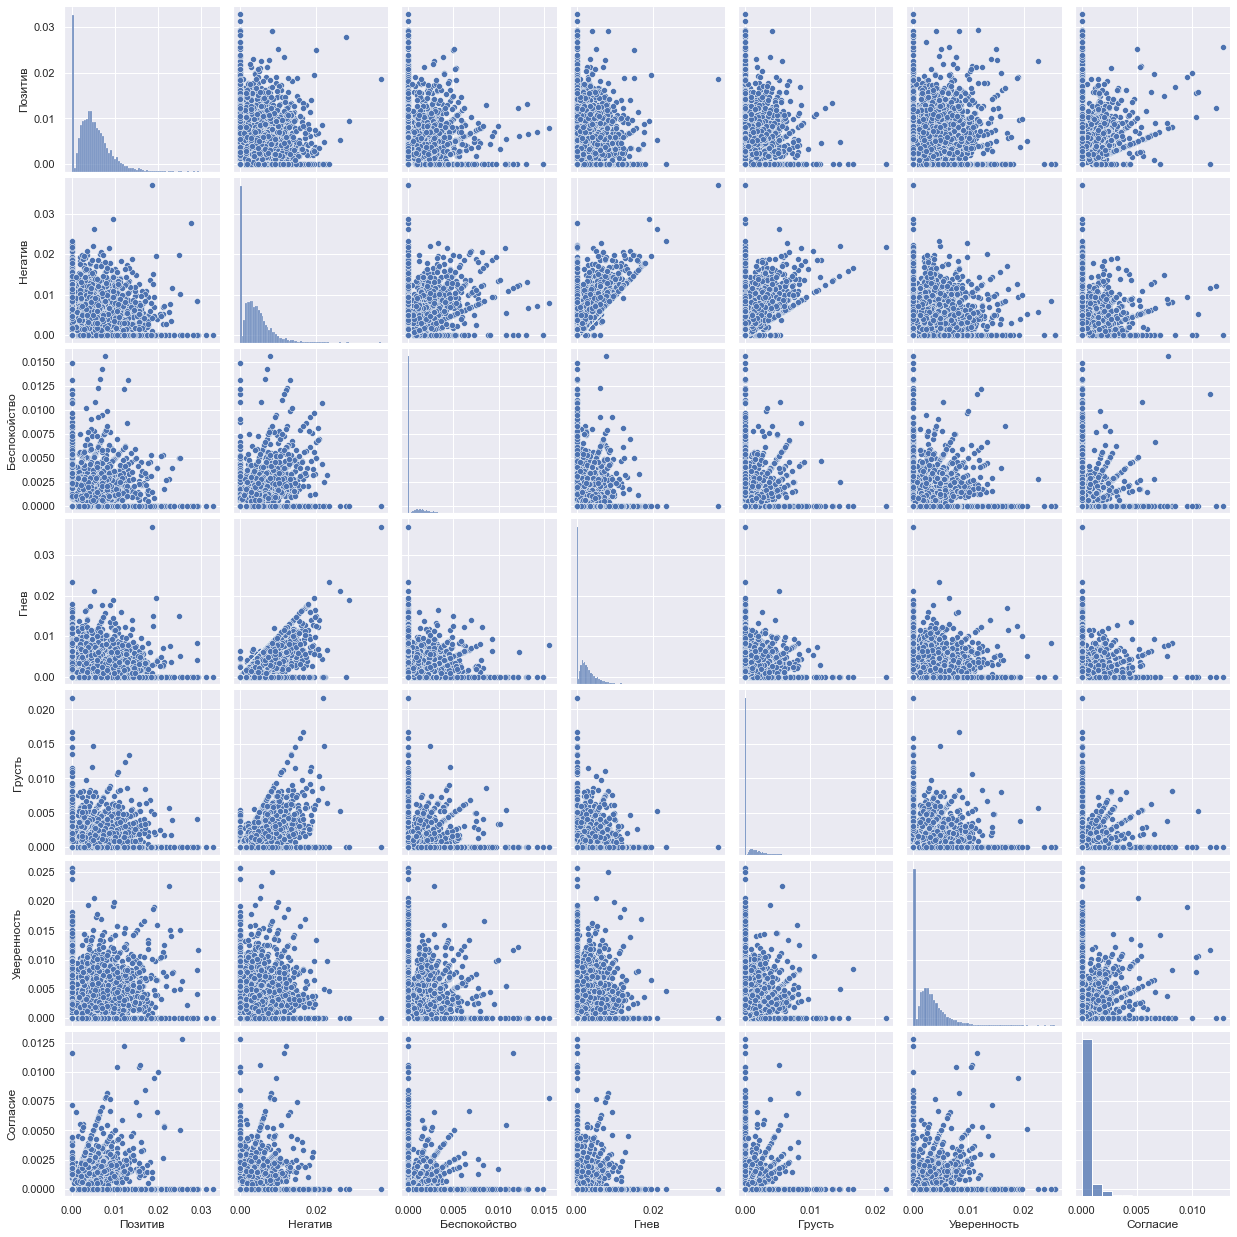

In [301]:
# Просто красиво :) 

sns.pairplot(df_target)

In [302]:
# Посчитаем 5 процентные перцентили для каждого из столбцов (без учета нулевых значений)

quantiles = [] 

for column in df_target: 
    quantiles.append(np.percentile(df_target[df_target[column] > 0][column], 5))
    
quantiles

[0.0016923624166148283,
 0.0013297872340425534,
 0.0005683756266473719,
 0.000871157272279292,
 0.0006157635467980296,
 0.0010992033269260992,
 0.00045197760887604355]

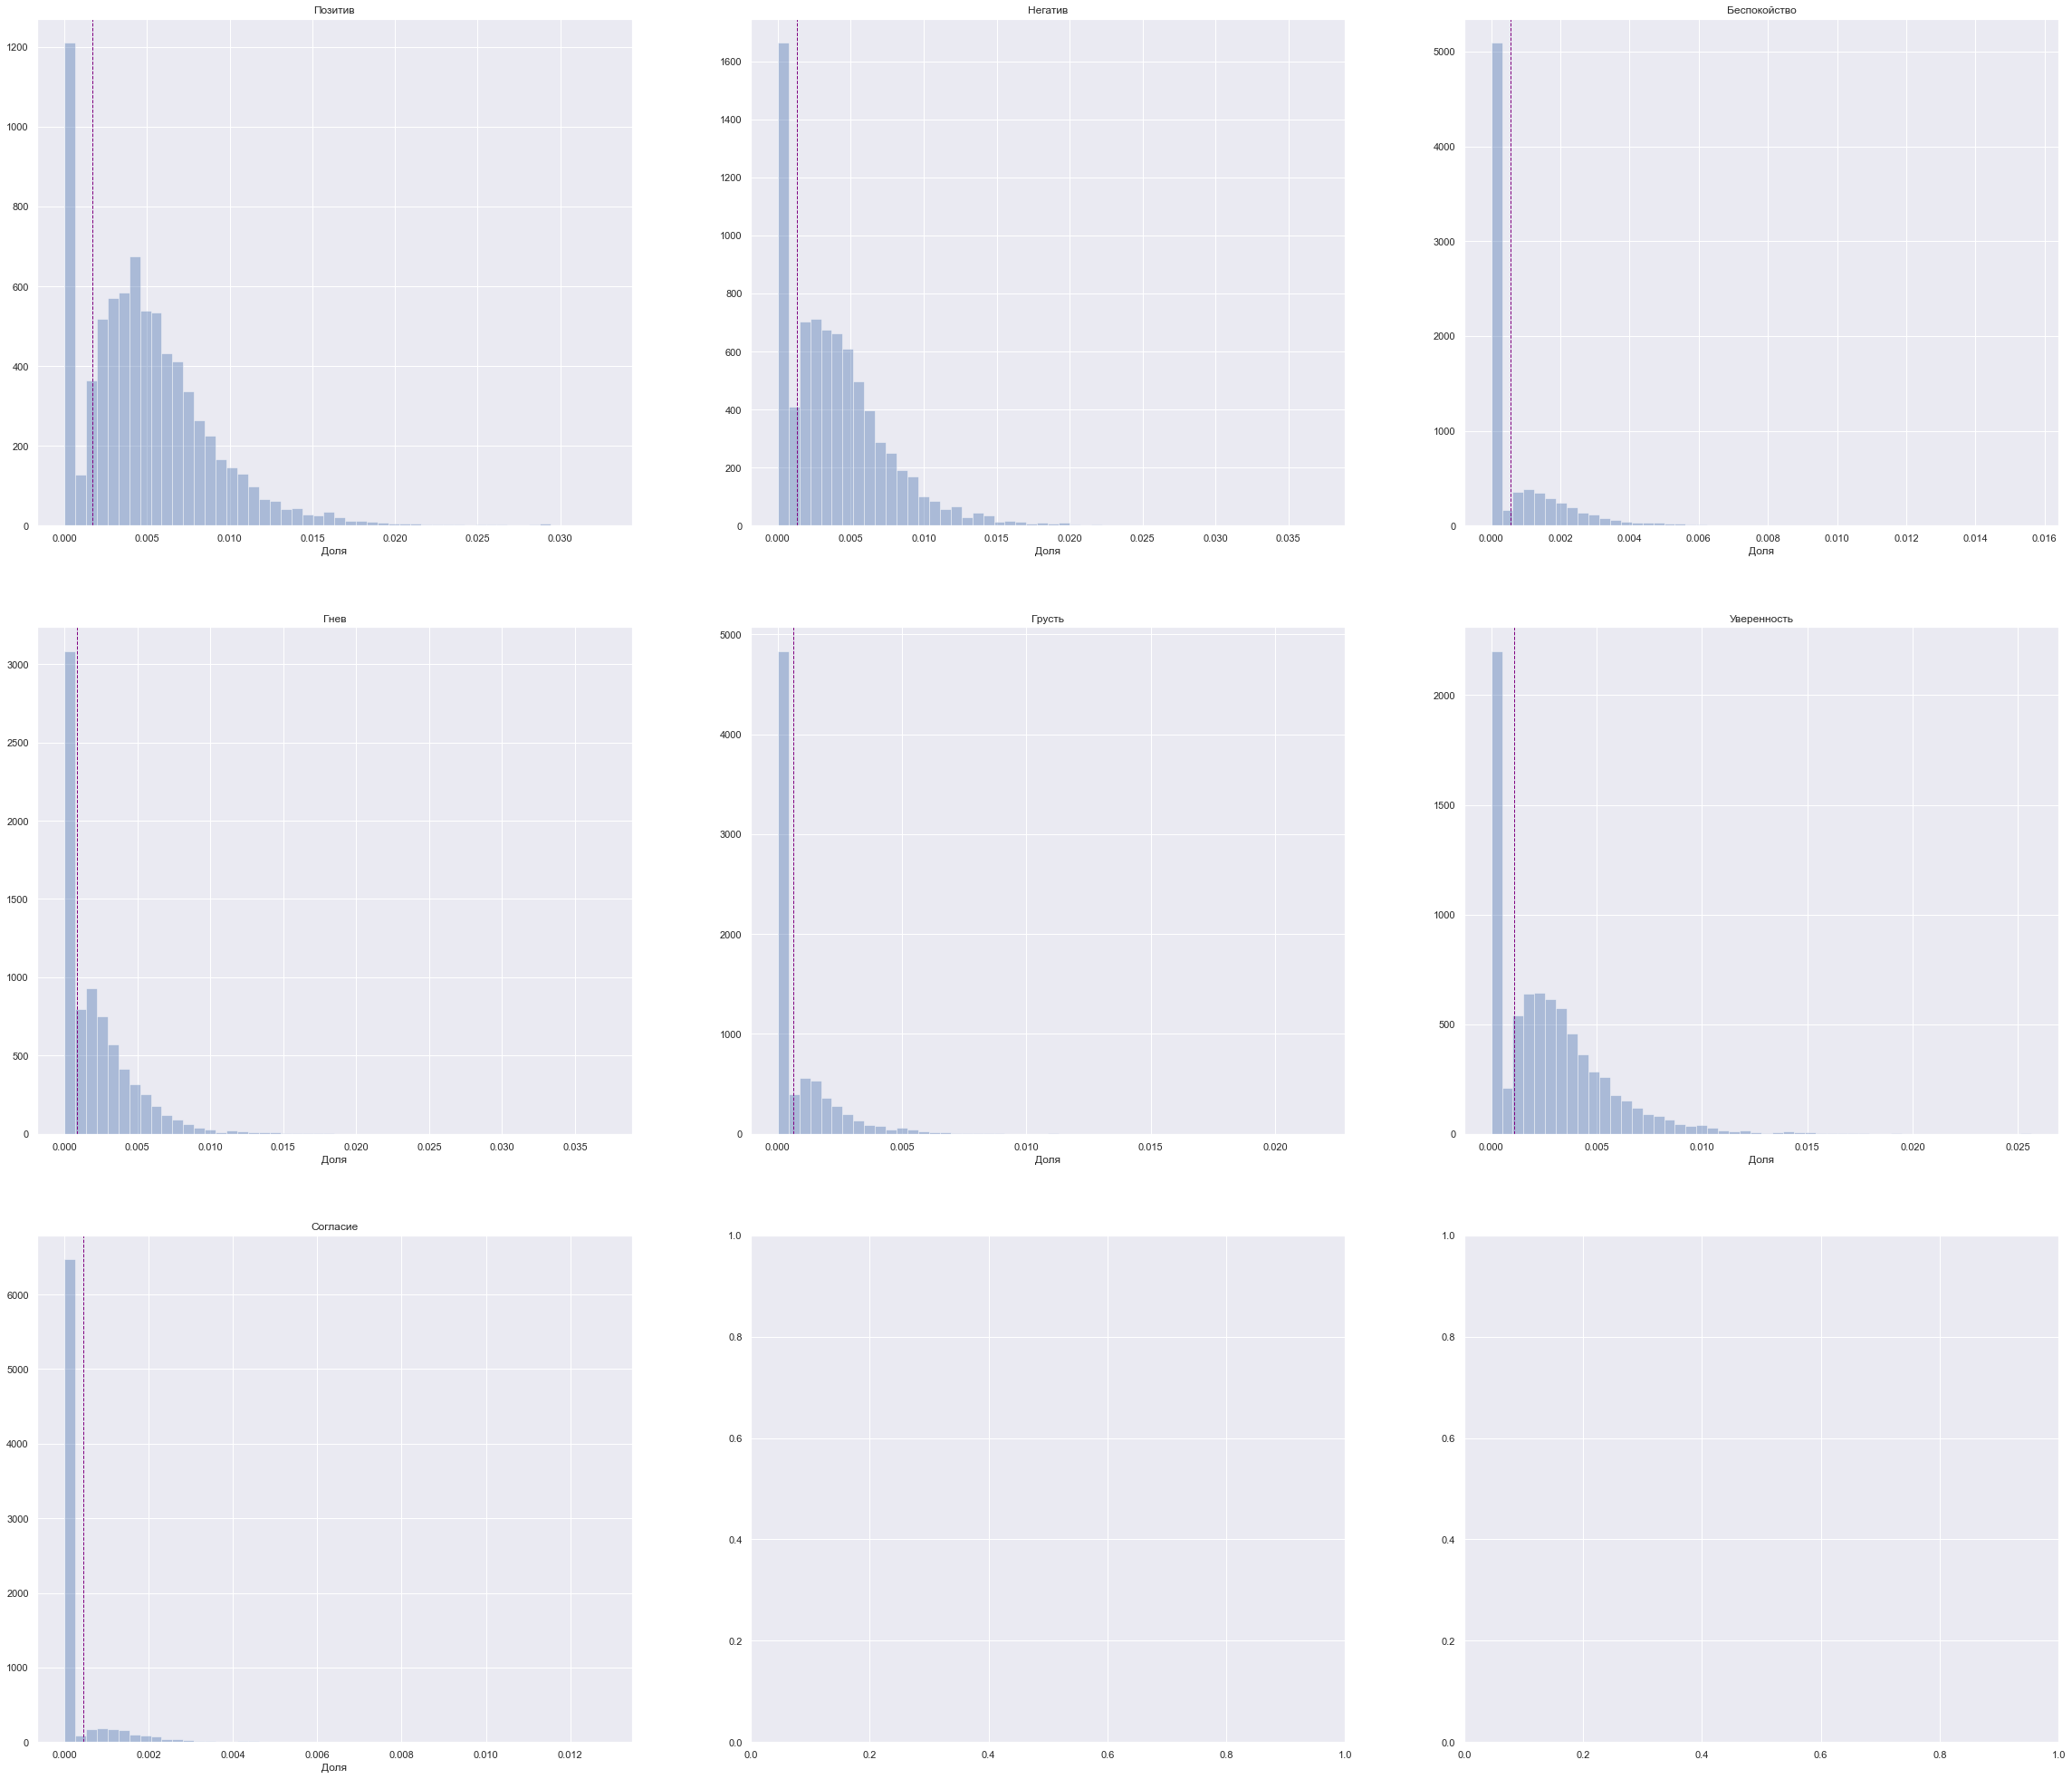

In [303]:
# Смотрим на распределение долей каждого из классов 

fig, axs = plt.subplots(3, 3, figsize=(40, 35))
for i in range(3): 
    for j in range(3): 
        if i == 2 and j > 0: 
            break 
        sns.distplot(df_target.iloc[:, i * 3 + j], kde=False, ax=axs[i, j])
        axs[i, j].axvline(quantiles[i * 3 + j], color='purple', linestyle='dashed', linewidth=1)
        axs[i, j].set(title=df_target.columns[i * 3 + j], xlabel='Доля')

Судя по графикам, фильтрация по квантили уберет не слишком много сообщений. 

In [304]:
df_target_copy = df_target.copy()

In [305]:
# df_target = df_target_copy.copy()

In [306]:
for i, column in enumerate(df_target):
    df_target[column].where(df_target[column] > quantiles[i], 0.0, inplace=True)
    
df_target.head()

,Позитив,Негатив,Беспокойство,Гнев,Грусть,Уверенность,Согласие
0,0.000000,0.005831,0.000000,0.002915,0.002915,0.005831,0.002915
1,0.002941,0.003922,0.000980,0.000000,0.001961,0.003922,0.000980
2,0.000000,0.014563,0.004854,0.000000,0.004854,0.000000,0.000000
3,0.004972,0.002841,0.000000,0.002841,0.000000,0.003551,0.000000
4,0.006803,0.009524,0.002721,0.000000,0.004082,0.004082,0.002721


In [307]:
# df = df_copy.copy()

In [308]:
df = df.join(df_target)
df.head()

,Author,Date,Text,Позитив,Негатив,Беспокойство,Гнев,Грусть,Уверенность,Согласие
0,Михаил Богословский,1916-11-01,"Был в факультетском заседании, на котором Груш...",0.000000,0.005831,0.000000,0.002915,0.002915,0.005831,0.002915
1,Лев Троцкий,1916-11-01,Утром со шпиком ходил на почту. После того пос...,0.002941,0.003922,0.000980,0.000000,0.001961,0.003922,0.000980
2,Анатолий Савенко,1916-11-01,"Как жаль, что страна не узнает речи Милюкова. ...",0.000000,0.014563,0.004854,0.000000,0.004854,0.000000,0.000000
3,Великий князь Николай Михайлович,1916-11-01,"Я долго колебался открыть тебе истину, но посл...",0.004972,0.002841,0.000000,0.002841,0.000000,0.003551,0.000000
4,Императрица Александра Федоровна,1916-11-01,"Мой любимый, дорогой! Я очень огорчена тем, чт...",0.006803,0.009524,0.002721,0.000000,0.004082,0.004082,0.002721


In [309]:
df.shape

(7734, 10)

In [310]:
df_copy = df.copy()

In [311]:
df = df[(df[emotions] != 0).any(1)]
df.head()

,Author,Date,Text,Позитив,Негатив,Беспокойство,Гнев,Грусть,Уверенность,Согласие
0,Михаил Богословский,1916-11-01,"Был в факультетском заседании, на котором Груш...",0.000000,0.005831,0.000000,0.002915,0.002915,0.005831,0.002915
1,Лев Троцкий,1916-11-01,Утром со шпиком ходил на почту. После того пос...,0.002941,0.003922,0.000980,0.000000,0.001961,0.003922,0.000980
2,Анатолий Савенко,1916-11-01,"Как жаль, что страна не узнает речи Милюкова. ...",0.000000,0.014563,0.004854,0.000000,0.004854,0.000000,0.000000
3,Великий князь Николай Михайлович,1916-11-01,"Я долго колебался открыть тебе истину, но посл...",0.004972,0.002841,0.000000,0.002841,0.000000,0.003551,0.000000
4,Императрица Александра Федоровна,1916-11-01,"Мой любимый, дорогой! Я очень огорчена тем, чт...",0.006803,0.009524,0.002721,0.000000,0.004082,0.004082,0.002721


In [312]:
df.shape

(7382, 10)

In [313]:
df[emotions] = df[emotions].where(df[emotions] == 0, 1)
df.head()

,Author,Date,Text,Позитив,Негатив,Беспокойство,Гнев,Грусть,Уверенность,Согласие
0,Михаил Богословский,1916-11-01,"Был в факультетском заседании, на котором Груш...",0.0,1.0,0.0,1.0,1.0,1.0,1.0
1,Лев Троцкий,1916-11-01,Утром со шпиком ходил на почту. После того пос...,1.0,1.0,1.0,0.0,1.0,1.0,1.0
2,Анатолий Савенко,1916-11-01,"Как жаль, что страна не узнает речи Милюкова. ...",0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,Великий князь Николай Михайлович,1916-11-01,"Я долго колебался открыть тебе истину, но посл...",1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,Императрица Александра Федоровна,1916-11-01,"Мой любимый, дорогой! Я очень огорчена тем, чт...",1.0,1.0,1.0,0.0,1.0,1.0,1.0


In [314]:
df.to_csv('diaries_revolution_labeled_ver1.csv', index=False)

Видно, что в результате предобработки убралось около 350 сообщений без особой эмоциональной окраски. 

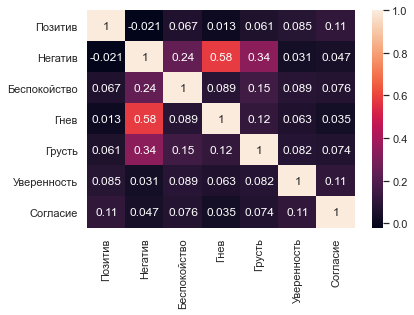

In [315]:
# Матрица корреляции классов друг с другом 

_ = df[emotions].corr() 
sns.heatmap(_, annot=True)

fig.show()

Можно заметить, что негатив довольно сильно коррелирует с такими эмоциями, как беспокойство, гнев и грусть (с гневом в особенности), что, на самом деле, довольно логично.

# Картинки

In [316]:
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [317]:
df_by_date = df.groupby('Date').sum()[emotions]
df_by_date = df_by_date.reset_index(level=0)
df_by_date

,Date,Позитив,Негатив,Беспокойство,Гнев,Грусть,Уверенность,Согласие
0,1916-11-01,11.0,13.0,6.0,9.0,9.0,13.0,5.0
1,1916-11-02,20.0,20.0,8.0,11.0,14.0,14.0,5.0
2,1916-11-03,13.0,10.0,6.0,8.0,4.0,9.0,4.0
3,1916-11-04,13.0,13.0,6.0,12.0,4.0,12.0,2.0
4,1916-11-05,14.0,13.0,4.0,10.0,6.0,9.0,3.0
...,...,...,...,...,...,...,...,...
426,1918-01-01,7.0,8.0,2.0,7.0,8.0,7.0,2.0
427,1918-01-02,10.0,9.0,1.0,9.0,5.0,8.0,1.0
428,1918-01-03,11.0,9.0,6.0,9.0,5.0,9.0,2.0
429,1918-01-04,14.0,12.0,6.0,8.0,8.0,13.0,3.0


In [318]:
def plot_emotions(ems, name): 
    plots = []
    for i in range(len(ems)): 
        plot = go.Scatter(x=df_by_date['Date'], y=ems[i], name=emotions[i])
        plots.append(plot)
    
    layout = go.Layout(height=500, width=1000, font=dict(size=12),
                           title=name,
                           xaxis=dict(title='Дата', type='date'),
                           yaxis=dict(title='Количество'))

    fig = go.Figure(data=plots, layout=layout)
    fig.update_xaxes(rangeslider_visible=True)
    fig.show()
    
    
ems = []
for i in range(len(emotions)):
    ems.append(df_by_date[emotions[i]])
    
plot_emotions(ems, 'Распределение эмоций')

In [319]:
_ = df_copy.groupby('Date').count()['Позитив'].values

df_by_date_scaled = df_by_date[emotions].div(_, axis=0)
df_by_date_scaled = df_by_date_scaled * 100 
df_by_date_scaled

,Позитив,Негатив,Беспокойство,Гнев,Грусть,Уверенность,Согласие
0,61.111111,72.222222,33.333333,50.000000,50.000000,72.222222,27.777778
1,86.956522,86.956522,34.782609,47.826087,60.869565,60.869565,21.739130
2,100.000000,76.923077,46.153846,61.538462,30.769231,69.230769,30.769231
3,81.250000,81.250000,37.500000,75.000000,25.000000,75.000000,12.500000
4,87.500000,81.250000,25.000000,62.500000,37.500000,56.250000,18.750000
...,...,...,...,...,...,...,...
426,77.777778,88.888889,22.222222,77.777778,88.888889,77.777778,22.222222
427,71.428571,64.285714,7.142857,64.285714,35.714286,57.142857,7.142857
428,84.615385,69.230769,46.153846,69.230769,38.461538,69.230769,15.384615
429,87.500000,75.000000,37.500000,50.000000,50.000000,81.250000,18.750000


In [320]:
def plot_emotions(ems, name): 
    plots = []
    for i in range(len(ems)): 
        plot = go.Scatter(x=df_by_date['Date'], y=ems[i], name=emotions[i])
        plots.append(plot)
    
    layout = go.Layout(height=500, width=1000, font=dict(size=12),
                           title=name,
                           xaxis=dict(title='Дата', type='date'),
                           yaxis=dict(title='Количество'))

    fig = go.Figure(data=plots, layout=layout)
    fig.update_xaxes(rangeslider_visible=True)
    fig.show()
    
    
ems = []
for i in range(len(emotions)):
    ems.append(df_by_date_scaled[emotions[i]])
    
plot_emotions(ems, 'Распределение эмоций (доля по дням)')

Картинки получились не очень информативными (хотя довольно удобно можно смотреть тренды эмоций отдельно или попарно). 

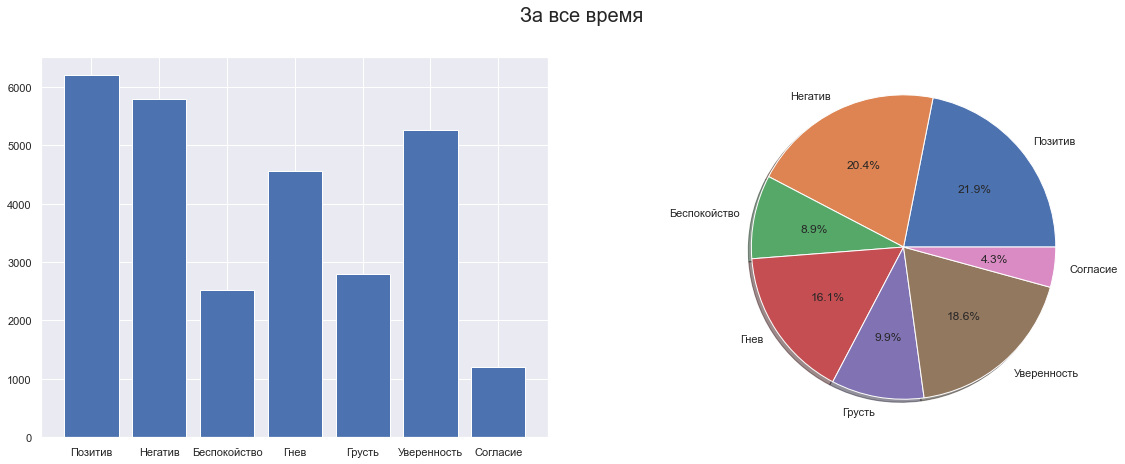

In [321]:
df_sum = df[emotions].sum(axis=0).to_frame().reset_index(level=0)
df_sum = df_sum.rename(columns={0: 'values'})

fracs = (df_sum['values'] / df_sum['values'].sum()) * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
ax1.bar(df_sum['index'], df_sum['values'])
ax2.pie(fracs, labels=df_sum['index'], autopct='%1.1f%%', shadow=True)

fig.suptitle('За все время', fontsize=20)
fig.show()

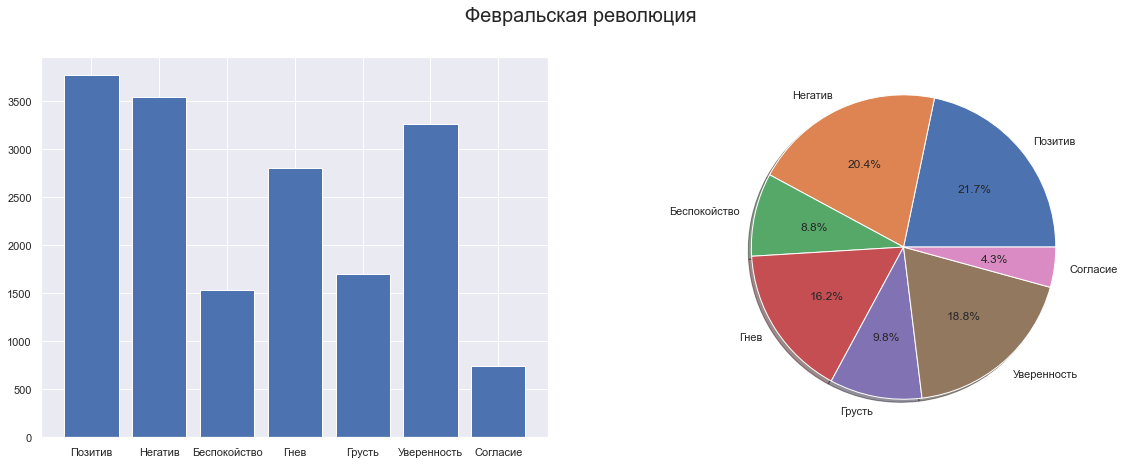

In [322]:
# Февральская революция (конец февраля - середина марта)

df_sum = df_by_date[(pd.to_datetime(df_by_date['Date']).dt.date >= dt.date(year=1917, month=2, day=20)) & 
                  (pd.to_datetime(df_by_date['Date']).dt.date < dt.date(year=1917, month=10, day=10))][emotions].sum(axis=0).to_frame()

df_sum = df_sum.reset_index(level=0).rename(columns={0: 'values'})

fracs = (df_sum['values'] / df_sum['values'].sum()) * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
ax1.bar(df_sum['index'], df_sum['values'])
ax2.pie(fracs, labels=df_sum['index'], autopct='%1.1f%%', shadow=True)

fig.suptitle('Февральская революция', fontsize=20)
fig.show()

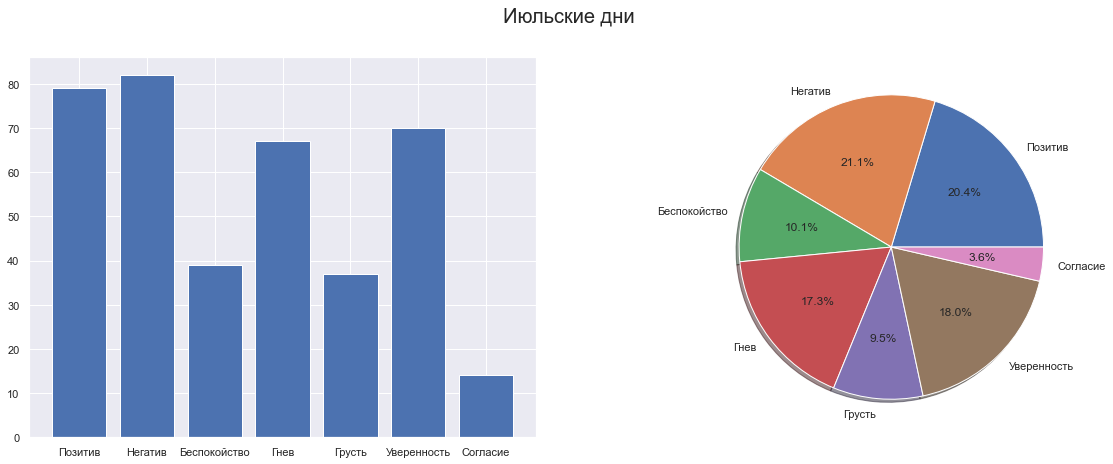

In [323]:
df_sum = df_by_date[(pd.to_datetime(df_by_date['Date']).dt.date >= dt.date(year=1917, month=7, day=3)) & 
                  (pd.to_datetime(df_by_date['Date']).dt.date <= dt.date(year=1917, month=7, day=5))][emotions].sum(axis=0).to_frame()

df_sum = df_sum.reset_index(level=0).rename(columns={0: 'values'})

fracs = (df_sum['values'] / df_sum['values'].sum()) * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
ax1.bar(df_sum['index'], df_sum['values'])
ax2.pie(fracs, labels=df_sum['index'], autopct='%1.1f%%', shadow=True)

fig.suptitle('Июльские дни', fontsize=20)
fig.show()

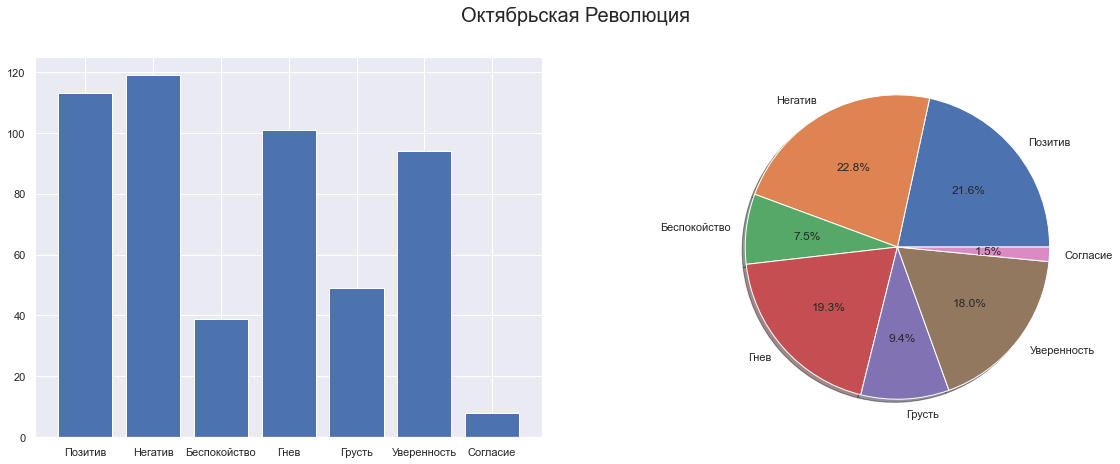

In [324]:
df_sum = df_by_date[(pd.to_datetime(df_by_date['Date']).dt.date >= dt.date(year=1917, month=10, day=23)) & 
                  (pd.to_datetime(df_by_date['Date']).dt.date <= dt.date(year=1917, month=10, day=27))][emotions].sum(axis=0).to_frame()

df_sum = df_sum.reset_index(level=0).rename(columns={0: 'values'})

fracs = (df_sum['values'] / df_sum['values'].sum()) * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
ax1.bar(df_sum['index'], df_sum['values'])
ax2.pie(fracs, labels=df_sum['index'], autopct='%1.1f%%', shadow=True)

fig.suptitle('Октябрьская Революция', fontsize=20)
fig.show()

Распределение эмоций в зависимости от временного промежутка, пусть и незначительно, но все же меняется. 

Из интересного, на мой взгляд, то, что доля гнева с ходом событий довольно сильно увеличивается (на `3%` в Октябрьскую Революцию относительно Февральской). Также стоит заметить, что доля согласия в октябре тоже примерно на `3%` меньше, чем в феврале. 

Если Февральская Революция, как говорится во многих учебниках, носила "буржуазный" характер, то есть власть, хоть и временно, перешла к людям из высших сословий - политическим деятелям, предпринимателям центристских и умеренно-либеральных взглядов, то Октябрьская Революция, по сути, являлась захватом власти пролетариатом, управляемого людьми, не входившими ни в один состав Временного Правительства (Ленин, Троцкий, Каменев и так далее).  

Поэтому, кажется, что изменения долей можно интерпретировать как то, что люди (тут важно заметить, что дневники в основном принадлежат людям из высших сословий, то есть поддерживавших более "буржуазный" состав правительства\*) все меньше поддерживали происходящие события, тем более с учетом того, что была некоторая договоренность отложить решения по поводу дальнейшей судьбы государства до Учредительного Собрания, выборы в которое должны были скоро начаться. 

\* - вообще круто было бы это как-нибудь проверить, но для этого нужен какой-то датасет политических взглядов видных людей того времени. 

# Предобработка данных и выделение признаков

## Предобработка

In [325]:
import re 
import nltk 
import pymorphy2
from nltk.corpus import stopwords 
from sklearn.feature_selection import chi2 as chi2
from sklearn.feature_extraction.text import TfidfVectorizer

In [326]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\timaa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [327]:
# df = df_unprocessed.copy()

In [328]:
morph = pymorphy2.MorphAnalyzer()

In [329]:
alnum_regex = re.compile("[А-Яа-я]+")

def find_words(text, regex = alnum_regex):
    tokens = regex.findall(text.lower())
    return [w for w in tokens if w.isalpha and len(w) > 3]

stopwords_set = set(stopwords.words('russian'))
stopwords_set.add('всё')
stopwords_set.add('это')
stopwords_set.add('мочь')
stopwords_set.add('очень')

def lemmatize(words, lemmer = morph, stopwords = stopwords_set):
    lemmas = [lemmer.parse(w)[0].normal_form for w in words]
    return [w for w in lemmas if not w in stopwords and w.isalpha()]

def preprocess(text):
    return (find_words(text))

In [330]:
df_unprocessed = df.copy() 

In [331]:
df['Text'] = df['Text'].apply(lambda x: lemmatize(preprocess(x)))
df['Text'] = df['Text'].apply(lambda x: ' '.join(x))
print(df['Text'].iloc[0])

факультетский заседание который грушко предложить имя факультет войти совет возведение английский посол бьюкенить почётный член университет возражать предложение душа порыв англичанин холодный чопорный расчётливый порыв недопустимый француз


Для начала выделим TF-IDF признаки. Для этого: 
* Будем добавлять в словарь униграммы и биграммы; 
* Выкинем токены, имеющие частоту больше 0.9 или меньше 0.0004; 
* Поставим `max_features = 10000` 

In [376]:
corpus = df['Text'].values

vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_df=0.9, min_df=0.0004, max_features=10000)
X = vectorizer.fit_transform(corpus)
X.shape

(7382, 10000)

Теперь попробуем сформировать признаки на основе word2vec. Возьмем предобученную модель `ruwikiruscorpora_upos_skipgram_300_2_2019` (Википедия + НКРЯ) с RusVectōrēs и дообучим на наших текстах. 

После этого для выделения признаков текстов будем брать взвешенное среднее векторов слов, где весами будут TF-IDF значения. 

In [335]:
import gensim 
from gensim.models import Word2Vec
# from gensim.test.utils import datapath

In [336]:
model_path = './182/model.bin'

model = gensim.models.KeyedVectors.load_word2vec_format(model_path, binary=True)

# TODO 

# Multi-label Classification

Первый бейзлайн - RF, обученный на TF-IDF. 

In [377]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [378]:
X_train, X_test, y_train, y_test = train_test_split(X, df[emotions], test_size=0.3, random_state=17)

In [379]:
clf = RandomForestClassifier(random_state=42, max_depth=150, min_samples_split=3)
multi_label_clf = MultiOutputClassifier(clf)
multi_label_clf.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(max_depth=150,
                                                       min_samples_split=3,
                                                       random_state=42))

In [380]:
y_pred_test = multi_label_clf.predict(X_test)
y_pred_train = multi_label_clf.predict(X_train)

In [381]:
# Test
print(classification_report(y_test, y_pred_test, target_names=emotions))

              precision    recall  f1-score   support

     Позитив       0.85      1.00      0.92      1872
     Негатив       0.78      1.00      0.87      1711
Беспокойство       0.92      0.44      0.60       803
        Гнев       0.79      0.91      0.85      1373
      Грусть       0.89      0.67      0.77       826
 Уверенность       0.77      0.97      0.86      1600
    Согласие       0.79      0.15      0.25       367

   micro avg       0.81      0.86      0.83      8552
   macro avg       0.83      0.73      0.73      8552
weighted avg       0.82      0.86      0.81      8552
 samples avg       0.79      0.87      0.80      8552



Вроде бы неплохо, но хочется попробовать улучшить `recall` беспокойства, грусти и согласия в особенности. 

Помимо этого, возможно я не прав в плане понимания метрик, но кажется, что `macro avg` меньше остальных средних из-за коррелированности негатива с другими отрицательными эмоциями. 

In [382]:
accuracy_score(y_test, y_pred_test)

0.22799097065462753

На мой взгляд, accuracy тут не очень информативная метрика, так что скорее для галочки. 

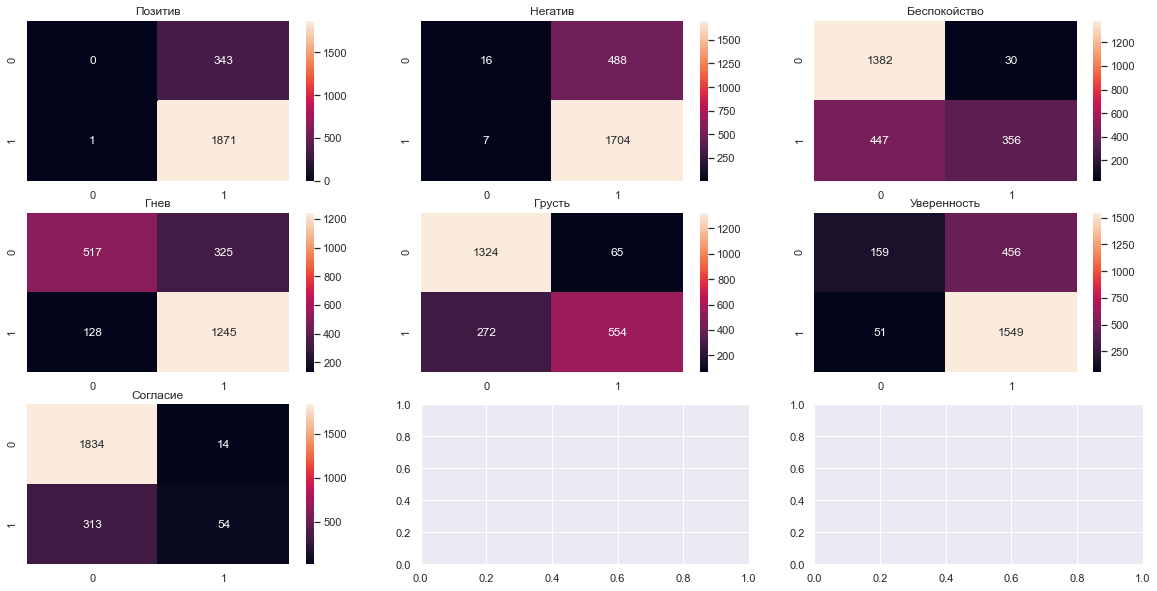

In [383]:
confusion_matrix = multilabel_confusion_matrix(y_test, y_pred_test)

fig, axs = plt.subplots(3, 3, figsize=(20, 10))

for i in range(3): 
    for j in range(3): 
        if i == 2 and j > 0: 
            break 
            
        _ = confusion_matrix[i * 3 + j]
        sns.heatmap(_, annot=True, ax=axs[i, j], fmt='d')
        axs[i, j].set(title=emotions[i * 3 + j])